In [11]:
from typing import List

import numpy as np
from librosa import load
from librosa.display import specshow
from tensorflow.keras.models import Model, load_model

import utils.constants as consts
from deep_dream import AudioDeepDreamer
from utils.audio_tools import convert_signal_into_mel_spectrogram, create_audio_player
from utils.displays import display_mel_spectrogram

PATH_TO_SAMPLE: str = '../long-audio/break_beat_1.wav'
PATH_TO_MODEL: str = '../models/model_72/epoch-62.pb'

<Figure size 432x288 with 0 Axes>

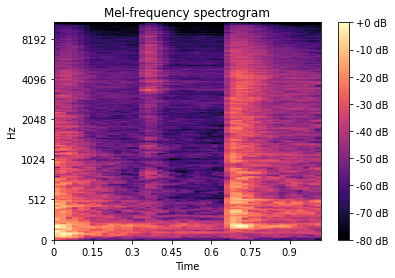

In [12]:
from librosa.util import normalize

signal: np.ndarray = load(PATH_TO_SAMPLE, sr=consts.SAMPLE_RATE, duration=1)[0]
signal = normalize(signal)

mel_spec: np.ndarray = convert_signal_into_mel_spectrogram(signal).reshape(consts.X_SHAPE)

create_audio_player(mel_spec, normalize=True)
display_mel_spectrogram(mel_spec)

In [13]:
base_model: Model = load_model(PATH_TO_MODEL)
base_model.summary()

Model: "model_39"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_40 (InputLayer)       [(None, 300, 44, 1)]      0         
                                                                 
 batch_norm (LayerNormalizat  (None, 300, 44, 1)       88        
 ion)                                                            
                                                                 
 conv_block_0 (Conv2D)       (None, 300, 44, 69)       1173      
                                                                 
 pooling_0 (MaxPooling2D)    (None, 150, 22, 69)       0         
                                                                 
 batch_norm_0 (BatchNormaliz  (None, 150, 22, 69)      276       
 ation)                                                          
                                                                 
 conv_dropout0 (Dropout)     (None, 150, 22, 69)       0  

### Get layers from base model and define a model for the deep dream algorithm.

In [14]:
names: List[str] = ['conv_block_3']  # Choose layer to optimize.
layers: List[Model] = [base_model.get_layer(name).output for name in names]

dream_model = Model(inputs=base_model.input, outputs=layers)
deep_dreamer = AudioDeepDreamer(dream_model)

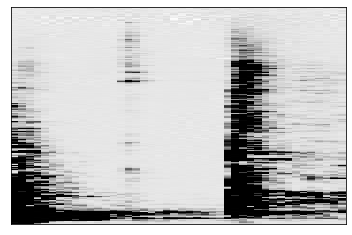

In [15]:
dreamed_signal = deep_dreamer.dreamify(_signal=mel_spec, steps=50, step_size=0.001)
dreamed_signal_np: np.ndarray = dreamed_signal.numpy()

specshow(dreamed_signal_np.reshape(300, 44), sr=consts.SAMPLE_RATE, cmap='binary')
create_audio_player(dreamed_signal.numpy())